In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

# Q1 aswer

# 1) Delivery_time -> Predict delivery time using sorting time

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [4]:
df = pd.read_csv(r"C:\Users\T.anitha\Downloads\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [7]:
df.shape

(21, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
df['Delivery Time'].corr(df['Sorting Time'])

0.8259972607955326

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

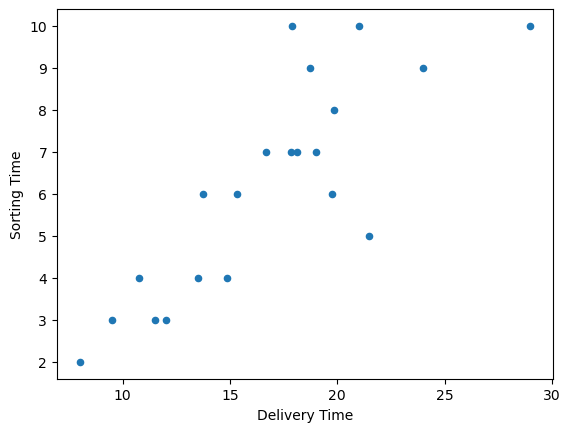

In [11]:
df.plot(kind = 'scatter',x ='Delivery Time',y ='Sorting Time')

In [12]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Density'>

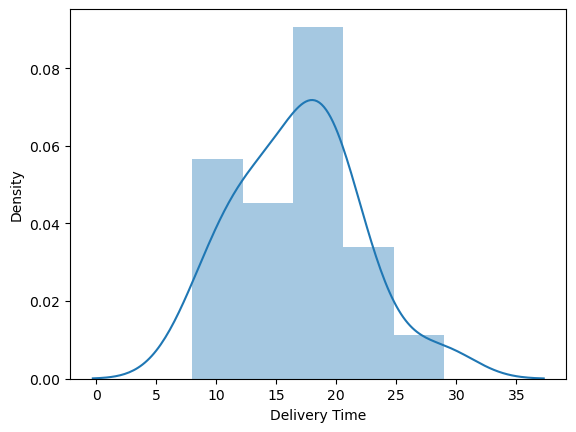

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

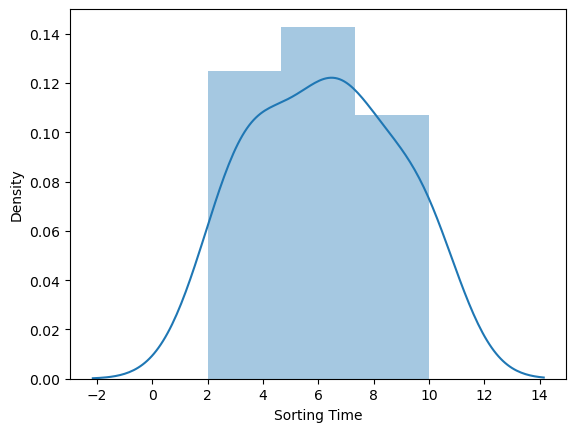

In [15]:
sns.distplot(df['Sorting Time'])

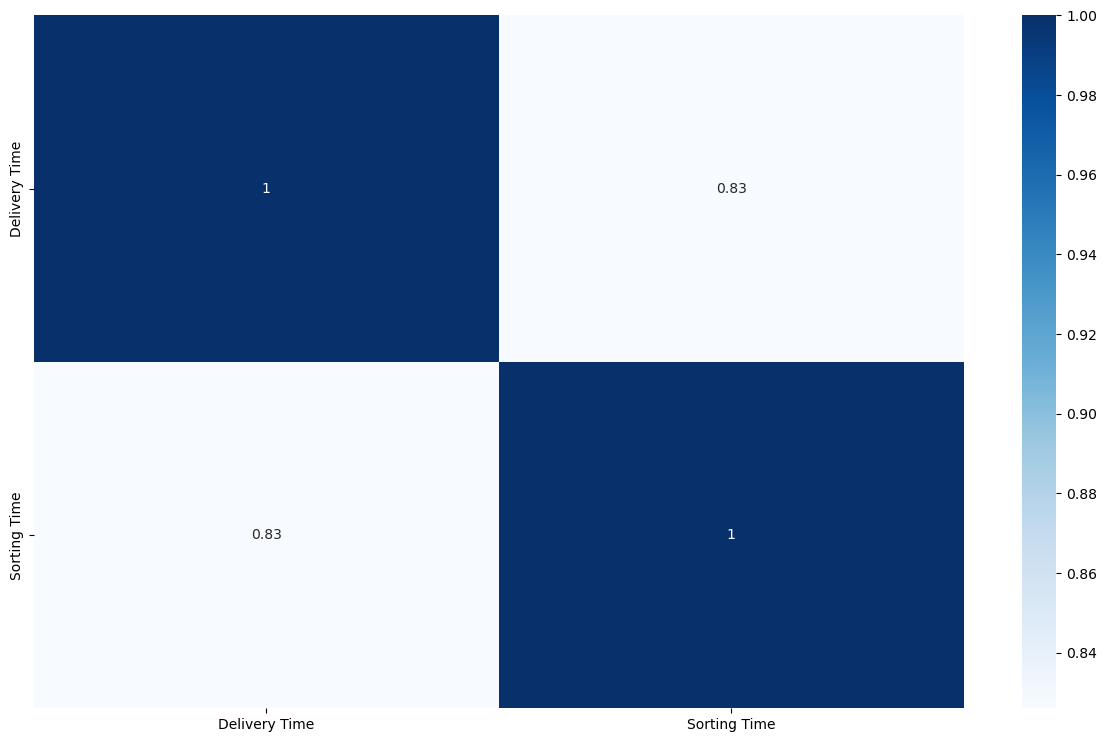

In [16]:
corr_matrix = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corr_matrix,annot = True,cmap = 'Blues')
plt.show()

# model fitting

In [17]:
x =df['Delivery Time']
y =df['Sorting Time']
model_sm = sm.OLS(x,y).fit()
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.953   
Dependent Variable:     Delivery Time    AIC:                         116.6971
Date:                   2023-12-26 11:36 BIC:                         117.7416
No. Observations:       21               Log-Likelihood:              -57.349 
Df Model:               1                F-statistic:                 424.5   
Df Residuals:           20               Prob (F-statistic):          6.12e-15
R-squared (uncentered): 0.955            Scale:                       14.479  
----------------------------------------------------------------------------------
                  Coef.      Std.Err.        t        P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
Sorting Time      2.5652       0.1245     20.6033     0.0000     2.3055     2.8250
------------------------------------------------------------------------------
Omnibus:                  1.504             Durbin-Watson:               1.305
Prob(Omnibus):            0.471             Jarque-Bera (JB):            0.508
Skew:                     -0.348            Prob(JB):                    0.776
Kurtosis:                 3.310             Condition No.:               1    
==============================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

In [18]:
model_st = stats.linregress(x,y)
model_st

LinregressResult(slope=0.413743628050077, intercept=-0.7566733660351268, rvalue=0.8259972607955326, pvalue=3.983049566687784e-06, stderr=0.06477449178474111, intercept_stderr=1.1339501242157985)

In [19]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()
regression_model.fit(pd.DataFrame(df['Delivery Time']),y=y)
print(regression_model.intercept_)
print(regression_model.coef_)

-0.7566733660351286
[0.41374363]


In [20]:
print(regression_model.score(X =pd.DataFrame(df['Delivery Time']),y =df['Sorting Time']))

0.682271474841723


In [21]:
train_prediction2 = regression_model.predict(X =pd.DataFrame(df['Delivery Time']))

In [22]:
df['Delivery Time'],train_prediction2

(0     21.00
 1     13.50
 2     19.75
 3     24.00
 4     29.00
 5     15.35
 6     19.00
 7      9.50
 8     17.90
 9     18.75
 10    19.83
 11    10.75
 12    16.68
 13    11.50
 14    12.03
 15    14.88
 16    13.75
 17    18.11
 18     8.00
 19    17.83
 20    21.50
 Name: Delivery Time, dtype: float64,
 array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
         5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
         7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
         5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
         8.13881464]))

KeyError: 'Delivery Time'

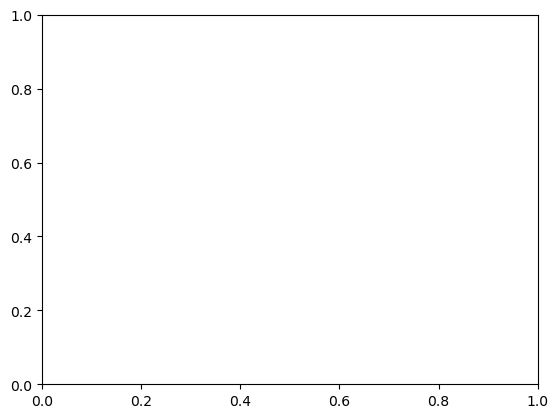

In [47]:
df.plot(kind = 'scatter',x = 'Delivery Time',y ='Sorting Time',color = 'black',xlim =(1,11),ylim =(1,22))
plt.plot(train_prediction2,color = 'blue')

# Q2 ANSWER

# 2) Salary_hike -> Build a prediction model for Salary_hike

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [26]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

In [27]:
df =pd.read_csv(r"C:\Users\T.anitha\Downloads\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [29]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [32]:
df.shape

(30, 2)

In [33]:
df['YearsExperience'].corr(df['Salary'])

0.9782416184887599

<Axes: xlabel='YearsExperience', ylabel='Salary'>

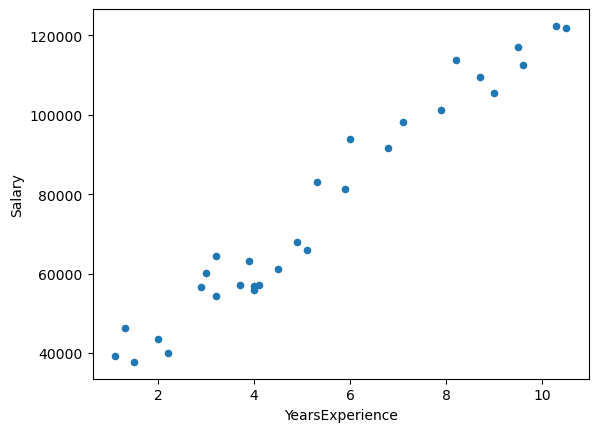

In [34]:
df.plot(kind = 'scatter',x = 'YearsExperience',y = 'Salary')

<Axes: xlabel='YearsExperience', ylabel='Density'>

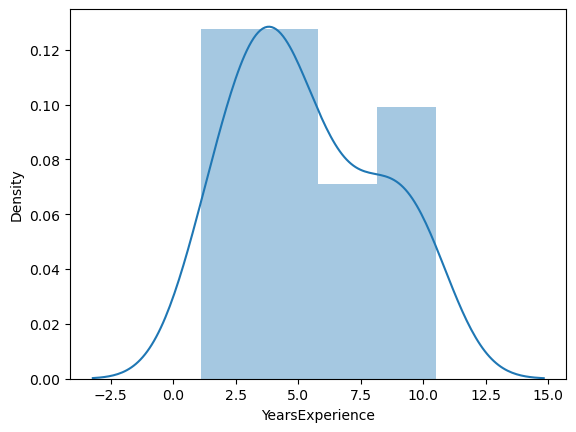

In [35]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

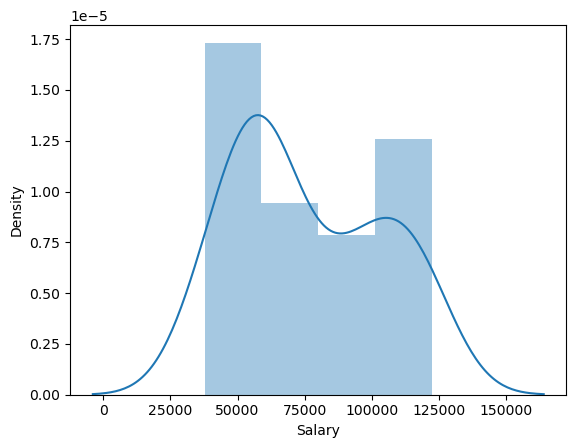

In [36]:
sns.distplot(df['Salary'])

# modelfitting

In [37]:
x =df ['Salary']
y = df['YearsExperience']
model_sm = sm.OLS(x,y).fit()
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.972     
Dependent Variable:     Salary           AIC:                         656.5563  
Date:                   2023-12-26 11:38 BIC:                         657.9575  
No. Observations:       30               Log-Likelihood:              -327.28   
Df Model:               1                F-statistic:                 1048.     
Df Residuals:           29               Prob (F-statistic):          2.56e-24  
R-squared (uncentered): 0.973            Scale:                       1.8110e+08
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
YearsExperience     13254.9385  409.4009  32.3764  0.0000  12417.6197  14092.2573
--------------------------------------------------------------------------------
Omnibus:                    0.610             Durbin-Watson:               0.323
Prob(Omnibus):              0.737             Jarque-Bera (JB):            0.671
Skew:                       -0.121            Prob(JB):                    0.715
Kurtosis:                   2.308             Condition No.:               1    
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [38]:
model_st = stats.linregress(x,y)
model_st

LinregressResult(slope=0.00010126565922605279, intercept=-2.3831605648243563, rvalue=0.9782416184887599, pvalue=1.1430681092271558e-20, stderr=4.058728526154741e-06, intercept_stderr=0.3272995342385636)

In [39]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()
regression_model.fit(X =pd.DataFrame(df['Salary']),y = y)
print(regression_model.intercept_)
print(regression_model.coef_)

-2.3831605648243546
[0.00010127]


In [40]:
regression_model.score(X =pd.DataFrame(df['Salary']),y = df['YearsExperience'])
train_prediction2 = regression_model.predict(X = pd.DataFrame(df['Salary']))

In [41]:
df['Salary'],train_prediction2

(0      39343.0
 1      46205.0
 2      37731.0
 3      43525.0
 4      39891.0
 5      56642.0
 6      60150.0
 7      54445.0
 8      64445.0
 9      57189.0
 10     63218.0
 11     55794.0
 12     56957.0
 13     57081.0
 14     61111.0
 15     67938.0
 16     66029.0
 17     83088.0
 18     81363.0
 19     93940.0
 20     91738.0
 21     98273.0
 22    101302.0
 23    113812.0
 24    109431.0
 25    105582.0
 26    116969.0
 27    112635.0
 28    122391.0
 29    121872.0
 Name: Salary, dtype: float64,
 array([ 1.60093427,  2.29581922,  1.43769402,  2.02442725,  1.65642785,
         3.35272891,  3.70796884,  3.13024825,  4.14290484,  3.40812122,
         4.01865188,  3.26685563,  3.38462759,  3.39718453,  3.80528514,
         4.49662579,  4.30330965,  6.03080053,  5.85611727,  7.12973546,
         6.90674848,  7.56851956,  7.87525325,  9.14208664,  8.69844179,
         8.30867027,  9.46178233,  9.02289696, 10.01084473,  9.95828786]))

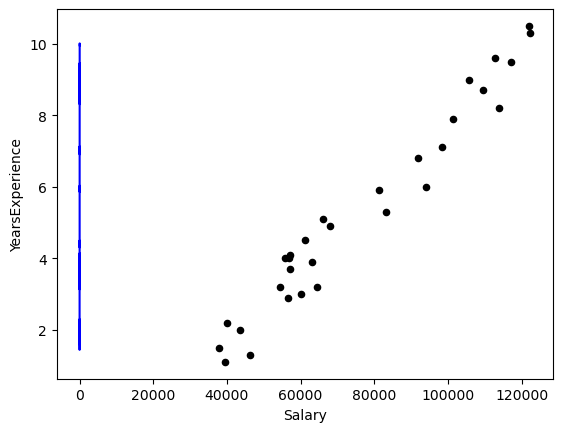

In [45]:
df.plot(kind ='scatter',x ='Salary',y = 'YearsExperience',color = 'black')
plt.plot(train_prediction2,color= 'blue')